In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('loan.csv')

D:\Python\Install\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.isnull().sum()

id                                                4
member_id                                     42542
loan_amnt                                         7
funded_amnt                                       7
funded_amnt_inv                                   7
term                                              7
int_rate                                          7
installment                                       7
grade                                             7
sub_grade                                         7
emp_title                                      2633
emp_length                                     1119
home_ownership                                    7
annual_inc                                       11
verification_status                               7
issue_d                                           7
loan_status                                       7
pymnt_plan                                        7
url                                               7
desc        

In [4]:
df1=df.drop(['id','member_id','title','zip_code','emp_title','issue_d',
             'earliest_cr_line','last_pymnt_d','last_credit_pull_d','url','desc','tax_liens',
             'delinq_amnt','acc_now_delinq'],axis=1)

In [5]:
df2 = df1[[column for column in df1 if ((df1[column].isnull().sum())/len(df1))*100 <= 60]]
df2.shape

(42542, 46)

In [6]:
df2.isnull().sum()/len(df1)*100

loan_amnt                     0.016454
funded_amnt                   0.016454
funded_amnt_inv               0.016454
term                          0.016454
int_rate                      0.016454
installment                   0.016454
grade                         0.016454
sub_grade                     0.016454
emp_length                    2.630342
home_ownership                0.016454
annual_inc                    0.025857
verification_status           0.016454
loan_status                   0.016454
pymnt_plan                    0.016454
purpose                       0.016454
addr_state                    0.016454
dti                           0.016454
delinq_2yrs                   0.084622
fico_range_low                0.016454
fico_range_high               0.016454
inq_last_6mths                0.084622
open_acc                      0.084622
pub_rec                       0.084622
revol_bal                     0.016454
revol_util                    0.228010
total_acc                

In [7]:
#Dropping rows with all NaN values
df2.dropna(how='all',inplace=True,axis=0)

D:\Python\Install\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
df2.reset_index(drop=True,inplace=True)

In [9]:
df2.shape

(42535, 46)

In [10]:
df2.isnull().sum()

loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                    1112
home_ownership                   0
annual_inc                       4
verification_status              0
loan_status                      0
pymnt_plan                       0
purpose                          0
addr_state                       0
dti                              0
delinq_2yrs                     29
fico_range_low                   0
fico_range_high                  0
inq_last_6mths                  29
open_acc                        29
pub_rec                         29
revol_bal                        0
revol_util                      90
total_acc                       29
initial_list_status              0
out_prncp                        0
out_prncp_inv       

In [11]:
#Dropping columns with one unique value
df3 = df2[[column for column in df2 if df1[column].nunique()>1]]
print("List of dropped columns:", end=" ")
for c in df2.columns:
    if c not in df3.columns:
        print(c, end=", ")

List of dropped columns: pymnt_plan, initial_list_status, out_prncp, out_prncp_inv, collections_12_mths_ex_med, policy_code, application_type, chargeoff_within_12_mths, hardship_flag, 

In [12]:
df3.shape

(42535, 37)

In [13]:
df3.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1112
home_ownership                0
annual_inc                    4
verification_status           0
loan_status                   0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                  29
fico_range_low                0
fico_range_high               0
inq_last_6mths               29
open_acc                     29
pub_rec                      29
revol_bal                     0
revol_util                   90
total_acc                    29
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collecti

In [14]:
intr=[]
for i in df3['int_rate'].values:
    x=i[:-1]
    intr.append(x)

In [15]:
df3['int_rate']=np.array(intr)

D:\Python\Install\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
pd.set_option('display.max_columns',150)
df3.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,pub_rec_bankruptcies,debt_settlement_flag
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0.0,735.0,739.0,1.0,3.0,0.0,13648.0,83.70%,9.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,171.62,714.0,710.0,0.0,N
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0.0,740.0,744.0,5.0,3.0,0.0,1687.0,9.40%,4.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,119.66,499.0,0.0,0.0,N
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0.0,735.0,739.0,2.0,2.0,0.0,2956.0,98.50%,10.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,649.91,739.0,735.0,0.0,N
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0.0,690.0,694.0,1.0,10.0,0.0,5598.0,21%,37.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,357.48,604.0,600.0,0.0,N
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Fully Paid,other,OR,17.94,0.0,695.0,699.0,0.0,15.0,0.0,27783.0,53.90%,38.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,67.30,684.0,680.0,0.0,N


In [17]:
df3 = df3.dropna(subset=['revol_util'],axis = 0)

In [18]:
rev=[]
for i in df3['revol_util'].values:
    x=i[:-1]
    rev.append(x)

In [19]:
df3['revol_util']=np.array(rev)

In [20]:
# Variable Broadcasting
df3=df3.astype({'int_rate':float})

In [21]:
# Variable Broadcasting
df3=df3.astype({'revol_util':float})

In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42445 entries, 0 to 42513
Data columns (total 37 columns):
loan_amnt                  42445 non-null float64
funded_amnt                42445 non-null float64
funded_amnt_inv            42445 non-null float64
term                       42445 non-null object
int_rate                   42445 non-null float64
installment                42445 non-null float64
grade                      42445 non-null object
sub_grade                  42445 non-null object
emp_length                 41336 non-null object
home_ownership             42445 non-null object
annual_inc                 42445 non-null float64
verification_status        42445 non-null object
loan_status                42445 non-null object
purpose                    42445 non-null object
addr_state                 42445 non-null object
dti                        42445 non-null float64
delinq_2yrs                42445 non-null float64
fico_range_low             42445 non-null float64


In [23]:
ter=[]
for i in df3['term'].values:
    x=i.split()[0]
    ter.append(x)

In [24]:
df3['term']=np.array(ter, dtype = float)        

In [25]:
df3.replace({'10+ years':10,'< 1 year':1,'1 year':1,'3 years':3, '8 years':8, '9 years':9,
       '4 years':4, '5 years':5, '6 years':6, '2 years':2, '7 years':7},inplace=True)

In [26]:
df3=df3.astype({'emp_length':float})

In [27]:
df3.shape

(42445, 37)

In [28]:
df3.dropna(inplace=True,subset=['annual_inc'],axis=0)

In [29]:
df3.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1109
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
fico_range_low                0
fico_range_high               0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collecti

In [30]:
df3.reset_index(inplace=True)

In [31]:
df3.replace({'Does not meet the credit policy. Status:Fully Paid':'Fully Paid',
             'Does not meet the credit policy. Status:Charged Off':'Charged Off'},inplace=True)

In [32]:
df3['loan_status'].value_counts()

Fully Paid     36036
Charged Off     6409
Name: loan_status, dtype: int64

In [33]:
df3['emp_length']=df3['emp_length'].fillna(df3['emp_length'].median())

In [34]:
df3['pub_rec_bankruptcies']=df3['pub_rec_bankruptcies'].fillna(df3['pub_rec_bankruptcies'].median())

In [35]:
df3.shape

(42445, 38)

In [36]:
df3.drop('index',axis = 1, inplace=True)

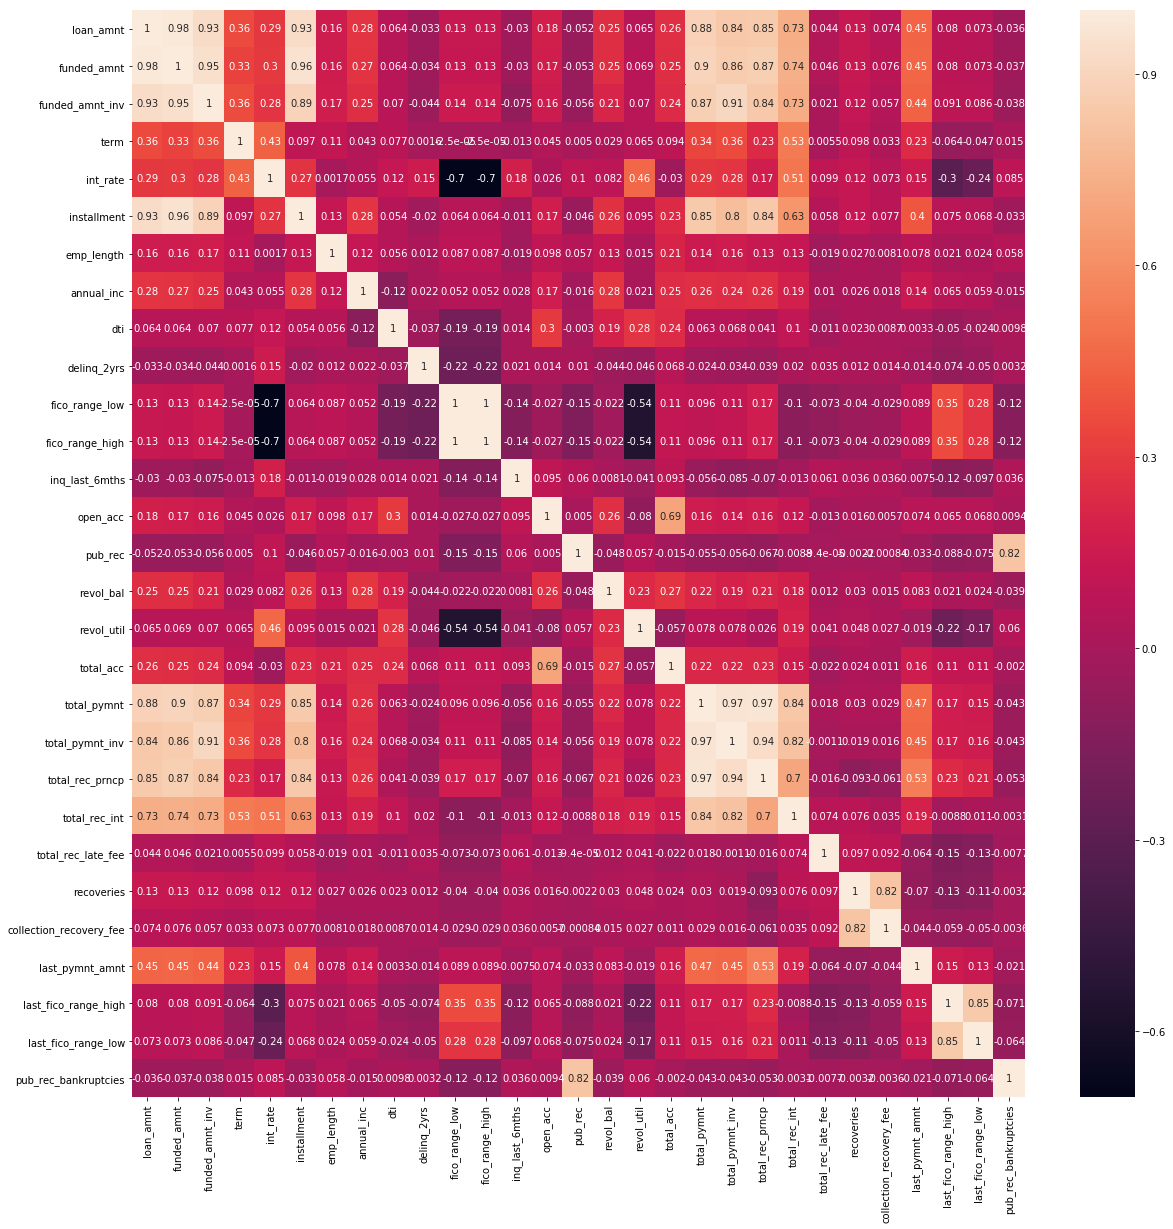

In [37]:
corrmat  = df3.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmat, annot = True)

In [38]:
pd.set_option('display.max_columns',150)
df3.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,pub_rec_bankruptcies,debt_settlement_flag
0,5000.0,5000.0,4975.0,36.0,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0.0,735.0,739.0,1.0,3.0,0.0,13648.0,83.7,9.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,171.62,714.0,710.0,0.0,N
1,2500.0,2500.0,2500.0,60.0,15.27,59.83,C,C4,1.0,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0.0,740.0,744.0,5.0,3.0,0.0,1687.0,9.4,4.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,119.66,499.0,0.0,0.0,N
2,2400.0,2400.0,2400.0,36.0,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0.0,735.0,739.0,2.0,2.0,0.0,2956.0,98.5,10.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,649.91,739.0,735.0,0.0,N
3,10000.0,10000.0,10000.0,36.0,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0.0,690.0,694.0,1.0,10.0,0.0,5598.0,21.0,37.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,357.48,604.0,600.0,0.0,N
4,3000.0,3000.0,3000.0,60.0,12.69,67.79,B,B5,1.0,RENT,80000.0,Source Verified,Fully Paid,other,OR,17.94,0.0,695.0,699.0,0.0,15.0,0.0,27783.0,53.9,38.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,67.30,684.0,680.0,0.0,N


In [39]:
df4 = pd.get_dummies(df3,drop_first=True)

In [40]:
pd.set_option('display.max_columns',1000)
df4.shape

(42445, 139)

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [42]:
X = df4.drop('int_rate',axis = 1)
X.shape

(42445, 138)

In [43]:
y = df4['int_rate']
y.head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 2)

In [45]:
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

In [46]:
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import max_error,mean_absolute_error,mean_squared_error,r2_score

In [53]:
Las = Lasso()
LinR = LinearRegression()
Rid = Ridge()
Rfc = RandomForestRegressor(random_state=2)
Boost_Lin = AdaBoostRegressor(base_estimator=LinR,random_state=2)
Boost_las = AdaBoostRegressor(base_estimator=Las,random_state=2)
Boost_rid = AdaBoostRegressor(base_estimator=Rid,random_state=2)
svr = SVR()

In [54]:
for model, name in zip([Las,LinR,Rid,Rfc,Boost_Lin,Boost_las,Boost_rid,svr], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Boosted Linear','Boosted Lasso','Boosted Ridge','SVR']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    print('Mean Absolute Error:', mean_absolute_error(y_test, Y_predict))  
    print('Mean Squared Error:', mean_squared_error(y_test, Y_predict))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_predict)))
    print('R2 : ',r2_score(y_test, Y_predict))
    print()
    
    

Lasso
Mean Absolute Error: 1.906835861944446
Mean Squared Error: 5.696711863523389
Root Mean Squared Error: 2.386778553515887
R2 :  0.5856210203448042

Linear Regression
Mean Absolute Error: 0.5857082051051187
Mean Squared Error: 0.6170150329047546
Root Mean Squared Error: 0.7855030444910793
R2 :  0.9551183093173237

Ridge
Mean Absolute Error: 0.5856313062150579
Mean Squared Error: 0.6168595965430483
Root Mean Squared Error: 0.7854040976102992
R2 :  0.9551296157626045



D:\Python\Install\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random forest Regressor
Mean Absolute Error: 0.49713090937647253
Mean Squared Error: 0.5028853441966389
Root Mean Squared Error: 0.7091440926896584
R2 :  0.9634201060534471

Boosted Linear
Mean Absolute Error: 0.8858567201108191
Mean Squared Error: 1.3245161283933673
Root Mean Squared Error: 1.1508762437349063
R2 :  0.9036546599214812

Boosted Lasso
Mean Absolute Error: 1.629319452888752
Mean Squared Error: 3.9951149540880353
Root Mean Squared Error: 1.9987783654242497
R2 :  0.7093952269412656

Boosted Ridge
Mean Absolute Error: 0.7699563553458666
Mean Squared Error: 1.0493694746964723
Root Mean Squared Error: 1.0243873655490252
R2 :  0.923668835176598

SVR
Mean Absolute Error: 0.6463204773422879
Mean Squared Error: 0.8757234335025434
Root Mean Squared Error: 0.9358009582718664
R2 :  0.9362998530505827



In [75]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [82]:
scaler = MinMaxScaler(feature_range=[0,1])
X_sc = scaler.fit_transform(X)
pca = PCA().fit(X_sc)

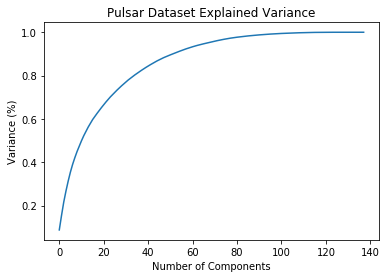

In [83]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Loan Dataset Explained Variance')
plt.show()

In [89]:
pca_var = pd.DataFrame((np.cumsum(pca.explained_variance_ratio_)))
pca_var = pca_var.T
pca_var.shape

(1, 138)

In [90]:
pd.set_option('display.max_columns',140)
pca_var.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137
0,0.087313,0.153709,0.215545,0.266617,0.31262,0.354082,0.389949,0.420893,0.449315,0.474588,0.499166,0.521927,0.542236,0.561908,0.579681,0.596699,0.611298,0.625343,0.639105,0.652439,0.665411,0.67793,0.690088,0.701582,0.712272,0.722902,0.732988,0.742908,0.752363,0.761499,0.770556,0.779312,0.78737,0.795243,0.802902,0.810117,0.817283,0.824281,0.831116,0.837644,0.844022,0.850165,0.856116,0.861908,0.867642,0.87288,0.87792,0.88279,0.887201,0.891431,0.895631,0.899754,0.903797,0.907812,0.911775,0.915637,0.919362,0.923045,0.926505,0.929753,0.932966,0.936065,0.93894,0.941709,0.944226,0.946731,0.949182,0.951602,0.954007,0.956392,0.95873,0.960998,0.963223,0.965245,0.967213,0.969152,0.970932,0.972631,0.974213,0.975677,0.977047,0.978341,0.979617,0.980859,0.981967,0.983024,0.984056,0.985053,0.985986,0.986893,0.98777,0.98862,0.98942,0.990175,0.990863,0.991535,0.992197,0.99283,0.993441,0.993936,0.994411,0.994859,0.995294,0.995718,0.996129,0.996522,0.996906,0.997262,0.997587,0.997886,0.998167,0.998441,0.998707,0.998919,0.999112,0.999269,0.999403,0.999531,0.999624,0.999687,0.999746,0.9998,0.999853,0.999897,0.99992,0.99994,0.999959,0.999977,0.999992,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Lasso


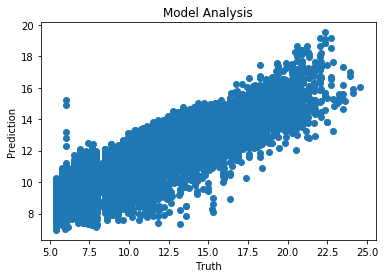

Linear Regression


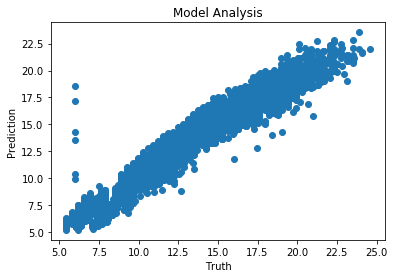

Ridge


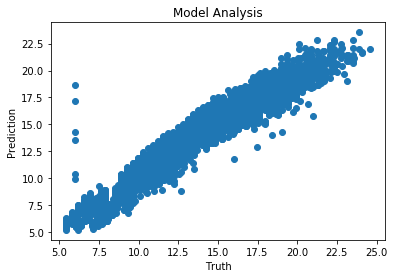

Random forest Regressor


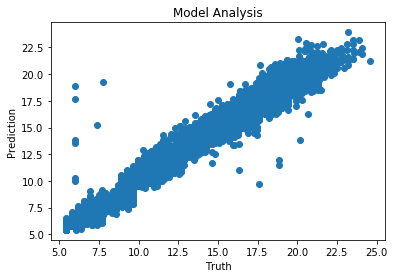

Boosted Linear


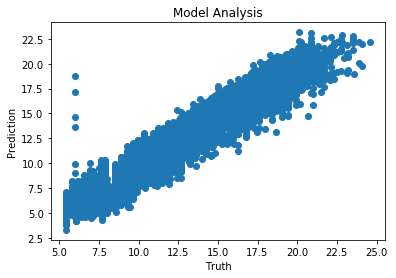

Boosted Lasso


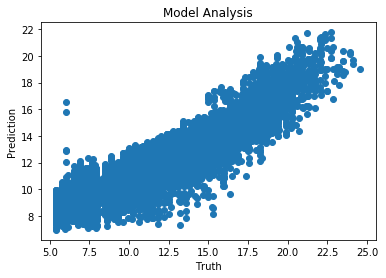

Boosted Ridge


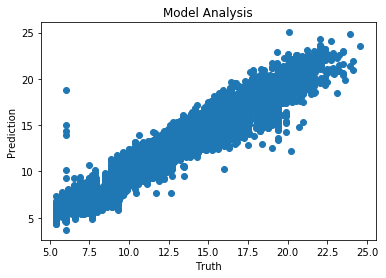

In [68]:
for model, name in zip([Las,LinR,Rid,Rfc,Boost_Lin,Boost_las,Boost_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Boosted Linear','Boosted Lasso','Boosted Ridge']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    plt.scatter(y_test, Y_predict)
    plt.title("Model Analysis")
    plt.xlabel("Truth")
    plt.ylabel("Prediction")
    plt.show()

In [69]:
n = np.arange(52,130)
for i in n:
    pca_comp = PCA(n_components=n)
    X_sc_pca = pca_comp.fit_transform(X_sc)
     

array([ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129])

In [97]:
pca_95 = PCA(n_components=0.95)
X_sc_pca = pca_95.fit_transform(X_sc)
pca95_var = np.cumsum(pca_95.explained_variance_ratio_)
X_sc_pca.shape

(42445, 68)

In [95]:
X_train_pca,X_test_pca,y_train_pca,y_test_pca = train_test_split(X_sc_pca,y,test_size=0.3,random_state = 2)

In [96]:
for model, name in zip([Las,LinR,Rid,Rfc,Boost_Lin,Boost_las,Boost_rid,svr], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Boosted Linear','Boosted Lasso','Boosted Ridge','SVR']):
    model1 = model.fit(X_train_pca,y_train_pca)
    Y_predict=model1.predict(X_test_pca)
    print(name)
    print('Mean Absolute Error:', mean_absolute_error(y_test_pca, Y_predict))  
    print('Mean Squared Error:', mean_squared_error(y_test_pca, Y_predict))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_pca, Y_predict)))
    print('R2 : ',r2_score(y_test_pca, Y_predict))
    print()
    

Lasso
Mean Absolute Error: 3.0157319978121047
Mean Squared Error: 13.747788256292926
Root Mean Squared Error: 3.707801000093307
R2 :  -1.4500757092195116e-05

Linear Regression
Mean Absolute Error: 0.9610509407156976
Mean Squared Error: 1.6464911345249598
Root Mean Squared Error: 1.2831567069243568
R2 :  0.8802341890056913

Ridge
Mean Absolute Error: 0.961048645868467
Mean Squared Error: 1.6465425137384901
Root Mean Squared Error: 1.2831767273990322
R2 :  0.8802304516802677

Random forest Regressor
Mean Absolute Error: 0.6968862101460658
Mean Squared Error: 1.0099059685095022
Root Mean Squared Error: 1.004940778608124
R2 :  0.9265394117160369

Boosted Linear
Mean Absolute Error: 1.0090970374951298
Mean Squared Error: 1.7721674617141454
Root Mean Squared Error: 1.3312278023366795
R2 :  0.8710924894647815

Boosted Lasso
Mean Absolute Error: 2.6983341924733777
Mean Squared Error: 10.619498131174364
Root Mean Squared Error: 3.2587571451665993
R2 :  0.2275374100938633

Boosted Ridge
Mean Ab

D:\Python\Install\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR
Mean Absolute Error: 0.886093116876894
Mean Squared Error: 1.7725851361326317
Root Mean Squared Error: 1.3313846687312543
R2 :  0.8710621078159448

